## 1- Exploratory Data Analysis (EDA)

In this notebook, we will conduct a comprehensive Exploratory Data Analysis (EDA) on the NBA rookie players dataset. The goal of this analysis is to better understand the data, identify patterns, and spot anomalies.

We will also clean and preprocess the data when needed.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("Set2")
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
import missingno as msno
from itables import show
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

### Load Data

We start by loading the dataset from `data/nba_logreg.csv` into a Pandas dataframe.

In [2]:
data = pd.read_csv("../data/nba_logreg.csv")
show(data)

### Data Profiling

I am going to use the `ydata-profiling` library to generate a profiling report for the dataset, and then I will replicate and detail the most important findings in this notebook.

In [3]:
# profile = ProfileReport(data, title="EDA Profiling Report - NBA Rookies")

In [4]:
# profile

In [5]:
# profile.to_file("../misc/eda_report.html")

Click [here](../misc/eda_report.html) to see the complete and interactive profiling report for the initial dataset.

### Data Exploration

#### Dataset description

The data used for this project (`nba_logreg.csv`) contains 21 columns (variables) and 1340 rows (observations).

**Data dictionary:**

| Field | Description |
| --- | --- |
| Name | Player Name |
| GP | Games Played |
| MIN | Minutes Played |
| PTS | Points Per Game |
| FGM | Field Goals Made |
| FGA | Field Goal Attempts |
| FG% | Field Goal Percent |
| 3P Made | 3-Points Made |
| 3PA | 3-Points Attempts |
| 3P% | 3-Points Percent |
| FTM | Free Throw Made |
| FTA | Free Throw Attempts |
| FT% | Free Throw Percent |
| OREB | Offensive Rebounds |
| DREB | Defensive Rebounds |
| REB | Rebounds |
| AST | Assists |
| STL | Steals |
| BLK | Blocks |
| TOV | Turnovers |
| TARGET_5Yrs | Outcome: 1 if career length >= 5 years, 0 otherwise |

In [6]:
data["TARGET_5Yrs"] = data["TARGET_5Yrs"].astype("category")

#### Missing values

The nullity matrix will allow us to visualize any missing values in our dataset.

<Axes: >

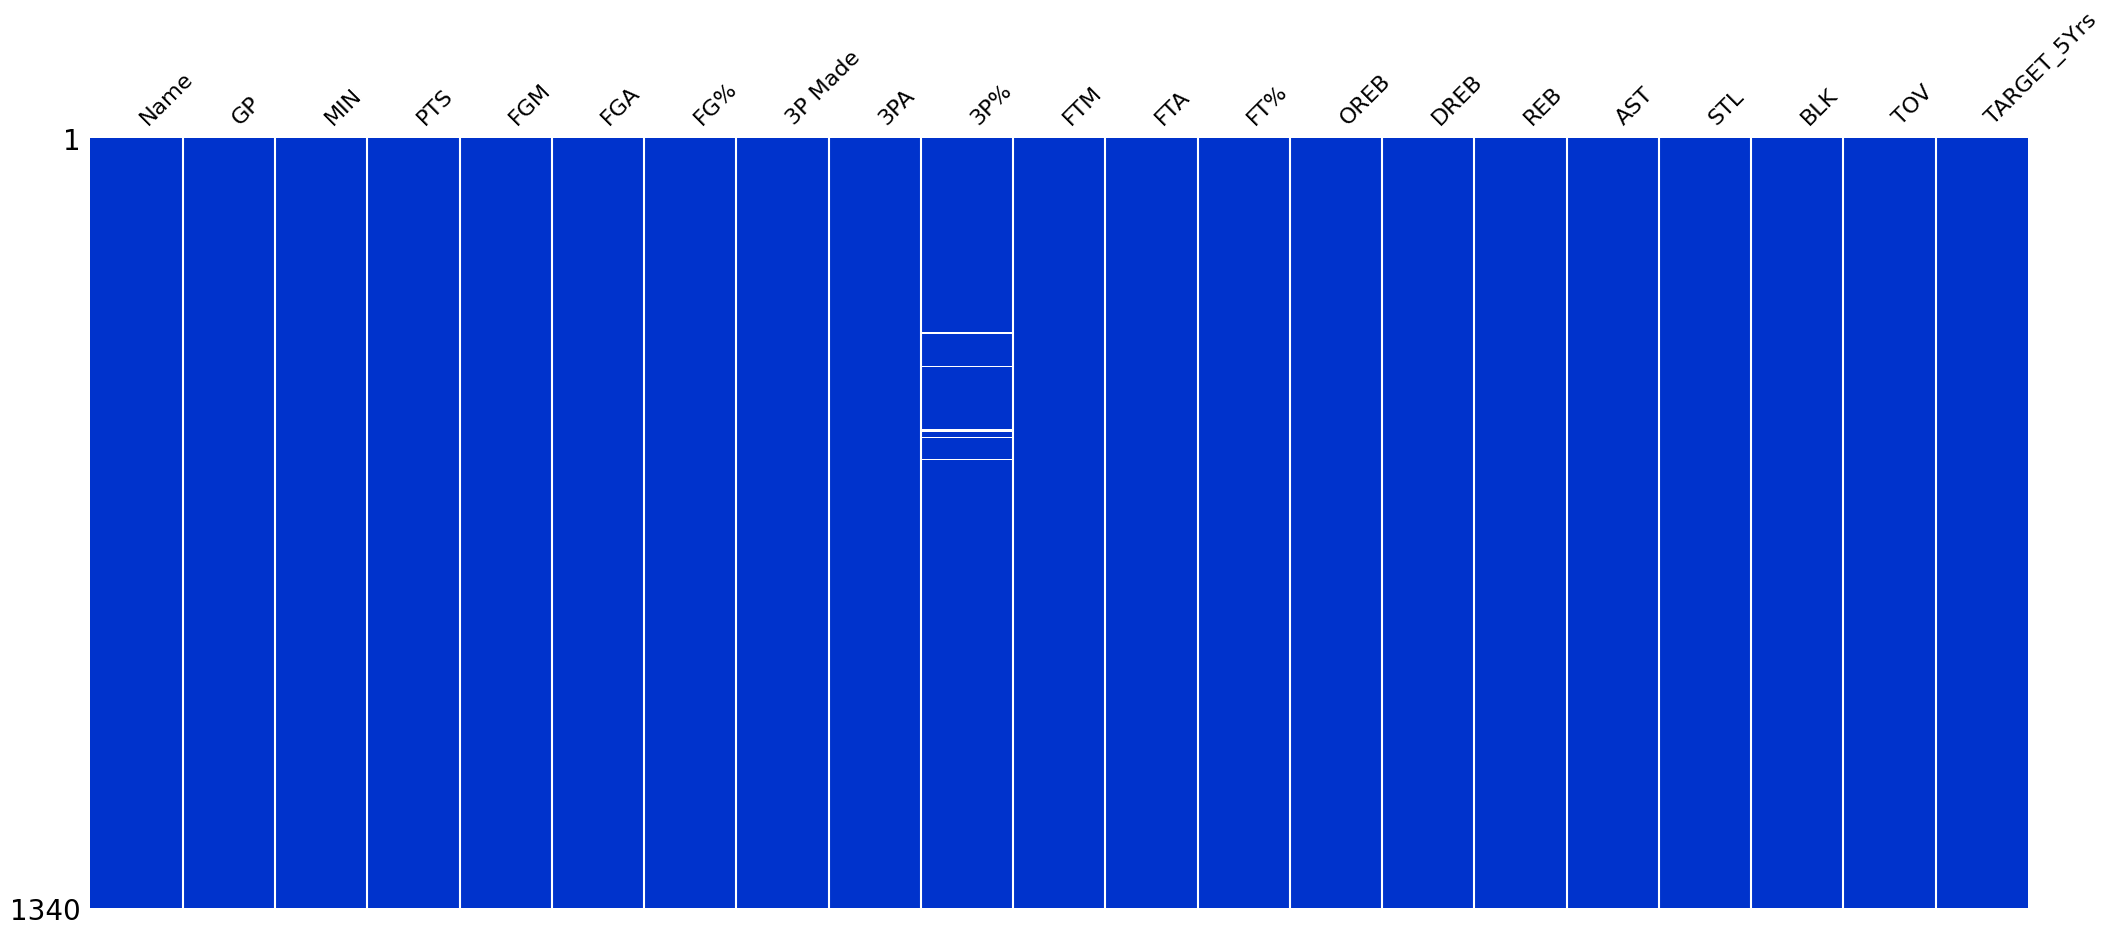

In [7]:
msno.matrix(data, labels=True, color=(0, 0.2, 0.8), sparkline=False)

The data is mostly clean. We can notice null/missing values in the `3P%` column. Let's inspect this more closely.

In [8]:
data.isnull().sum().sort_values(ascending=False)

3P%            11
Name            0
FTA             0
TOV             0
BLK             0
STL             0
AST             0
REB             0
DREB            0
OREB            0
FT%             0
FTM             0
GP              0
3PA             0
3P Made         0
FG%             0
FGA             0
FGM             0
PTS             0
MIN             0
TARGET_5Yrs     0
dtype: int64

We can notice that we have 11 null values in the `3P%` column. Let's examine these rows more closely.

In [9]:
data[data["3P%"].isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


Now it makes sense. The 11 NaN values in the `3P%` column correspond to the players that didn't attempt 3-point shots (`3PA`=0, so dividing by zero in the formula `3P%`=`3PM`/`3PA` leads to NaNs).

The most logical and straightforward solution will be to fill the empty values with zeros.

In [10]:
data.fillna(0, inplace=True)
data.isnull().sum().sort_values(ascending=False)

Name           0
FTA            0
TOV            0
BLK            0
STL            0
AST            0
REB            0
DREB           0
OREB           0
FT%            0
FTM            0
GP             0
3P%            0
3PA            0
3P Made        0
FG%            0
FGA            0
FGM            0
PTS            0
MIN            0
TARGET_5Yrs    0
dtype: int64

#### Duplicate rows

Let's check for duplicate rows in our dataset.

In [11]:
show(data[data.duplicated(keep=False)])

We observe we have multiple duplicate rows. Let's count them.

In [12]:
data.duplicated().sum()

12

We have 12 duplicate rows.

We will drop them.

In [13]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

#### Mislabeled Data and Duplicate Names

While exploring the dataset, I also noticed the presence of duplicate player names. Let's look at them more closely.

In [14]:
show(data[data.duplicated(subset="Name", keep=False)])

In [15]:
data.duplicated(subset="Name").sum()

34

We notice 2 cases:
- Rows that contain the same player name and the same stats, but with different target values
- Rows that contain different stats for players that hold the same name

Let's examine the first case more closely.

In [16]:
mislabeled_data = data[data.duplicated(subset=data.columns.difference(["TARGET_5Yrs"]), keep=False)]
show(mislabeled_data)

In [17]:
print("Percentage of mislabeled data:", round(100*len(mislabeled_data)/len(data), 2), "%")

Percentage of mislabeled data: 3.01 %


We can try to correct them manually by searching the internet, but since they only represent 3% of our data, we can safely discard them.

In [18]:
data.drop_duplicates(subset=data.columns.difference(["TARGET_5Yrs"]), keep=False, inplace=True)

In [19]:
show(data)

Let's now check the second case: Rows that contain different stats for players that hold the same name.

In [20]:
duplicate_names = data[data["Name"].duplicated(keep=False)].sort_values("Name")
show(duplicate_names)

Verifying some of the data on the internet, I found that there are some cases where 2 players hold the same name, other cases where we have one row of correct stats and another incorrect one for the same player, and cases where each row corresponds to the stats of different years for the same player.

In [21]:
print("Percentage of duplicated names:", round(100*len(duplicate_names)/len(data), 2), "%")

Percentage of duplicated names: 1.24 %


To avoid the hassle of cleaning our data by hand, we will delete these duplicates, since they only represent 1.24% of the data.

In [22]:
data.drop_duplicates(subset="Name", keep=False, inplace=True)

In [23]:
data.duplicated(subset="Name").sum()

0

#### Data scaling

We will use a boxplot to check if our data is normalized (same value scale).

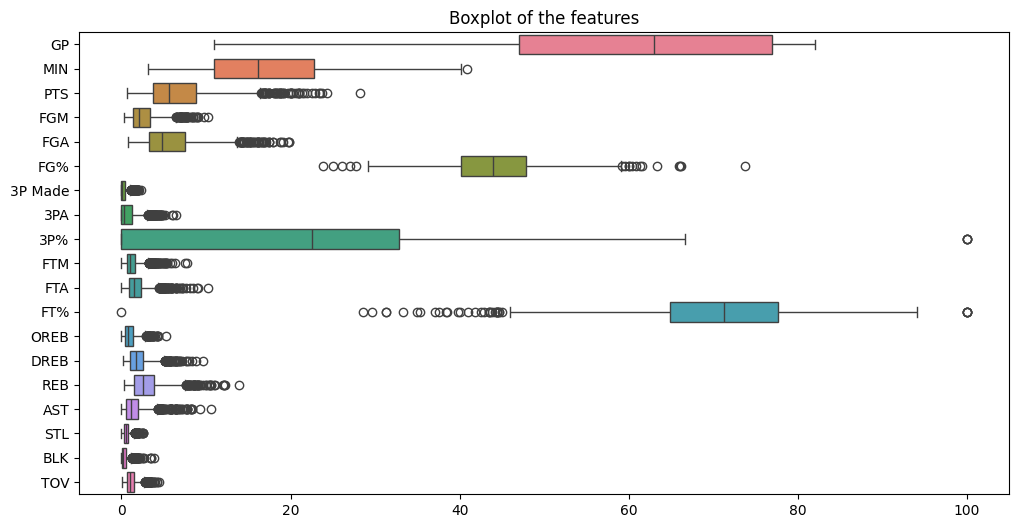

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of the features")
plt.show()

We notice that our data is not in the same scale.

We will have to normalize/standardize it when we create the model's training set later on.

We also notice a good sign: there are no major outliers in our data.

#### Saving the Data

In [25]:
data.to_csv("../data/nba_logreg_preprocessed.csv", index=False)

#### Data distribution

##### Target Distribution Analysis

We will now check the distribution of the target variable.

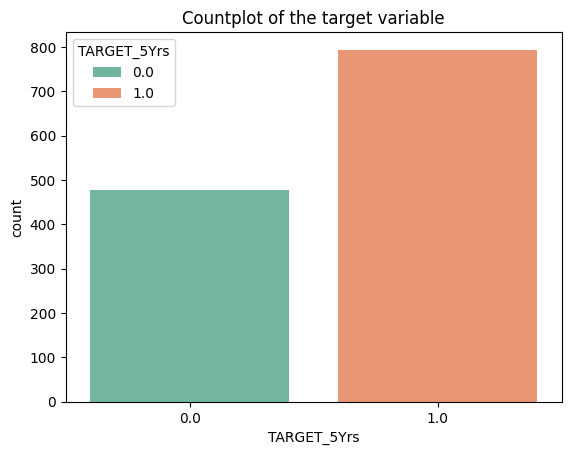

TARGET_5Yrs
1.0    0.624214
0.0    0.375786
Name: proportion, dtype: float64

In [26]:
sns.countplot(x="TARGET_5Yrs", data=data, hue="TARGET_5Yrs")
plt.title("Countplot of the target variable")
plt.show()
data["TARGET_5Yrs"].value_counts(normalize=True)

Our data is not perfectly balanced. However, the imbalance ratio is still very acceptable and should not cause any significant performance degradation. 

##### Feature distribution analysis

Let's now see the dustribution and properties of our features with respect to the target variable.

We start by separating them in our dataset.

In [27]:
exclude_columns = ["Name", "TARGET_5Yrs"]
features = data.columns.difference(exclude_columns, sort=False)
target = "TARGET_5Yrs"

For every feature, we plot its distribution and its distribution with respect to the target variable, as well as the average values and boxplots by target category.

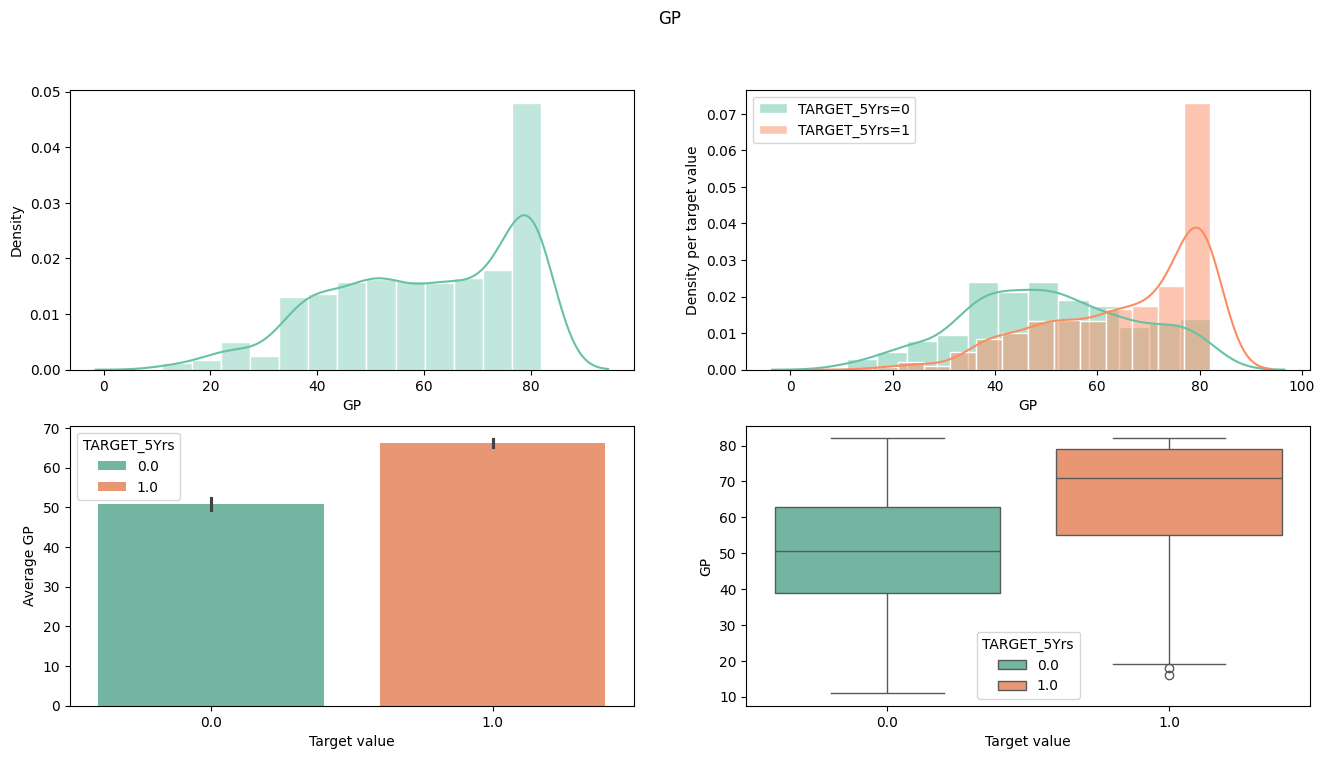

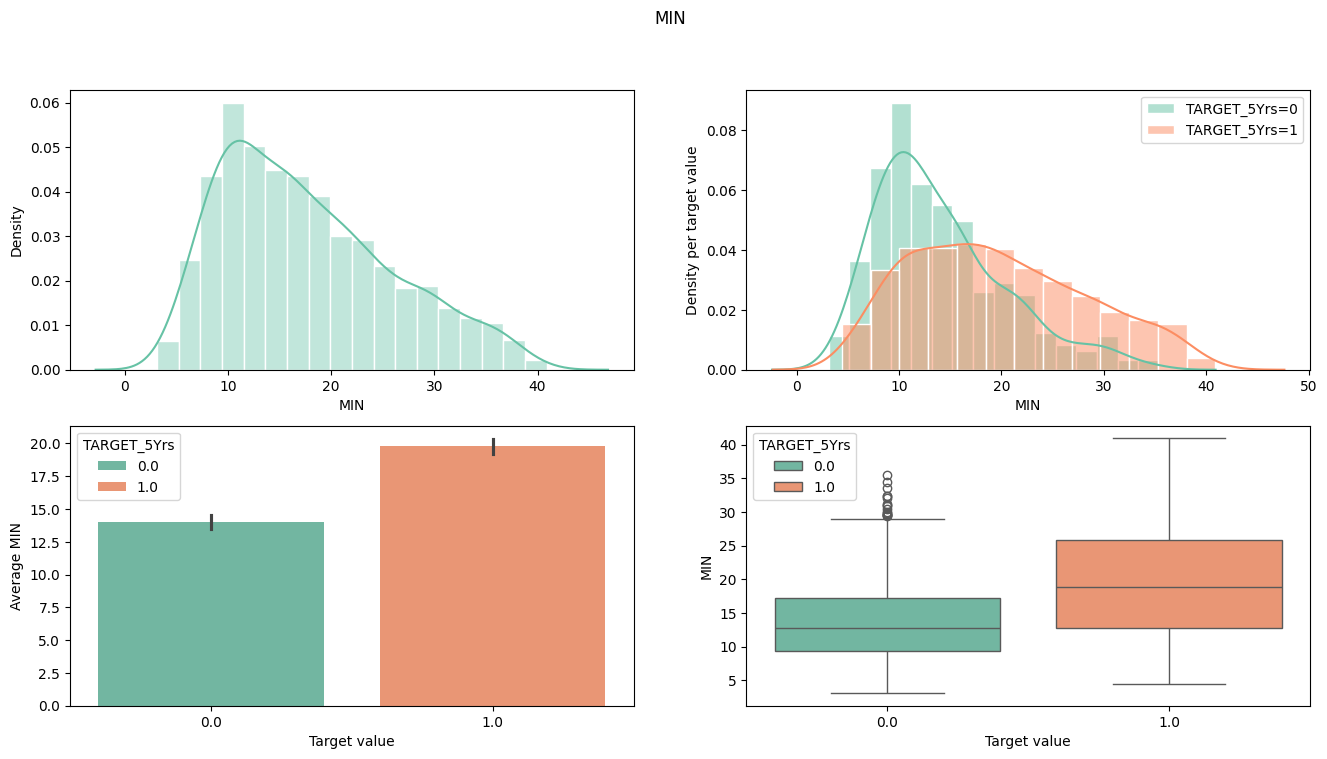

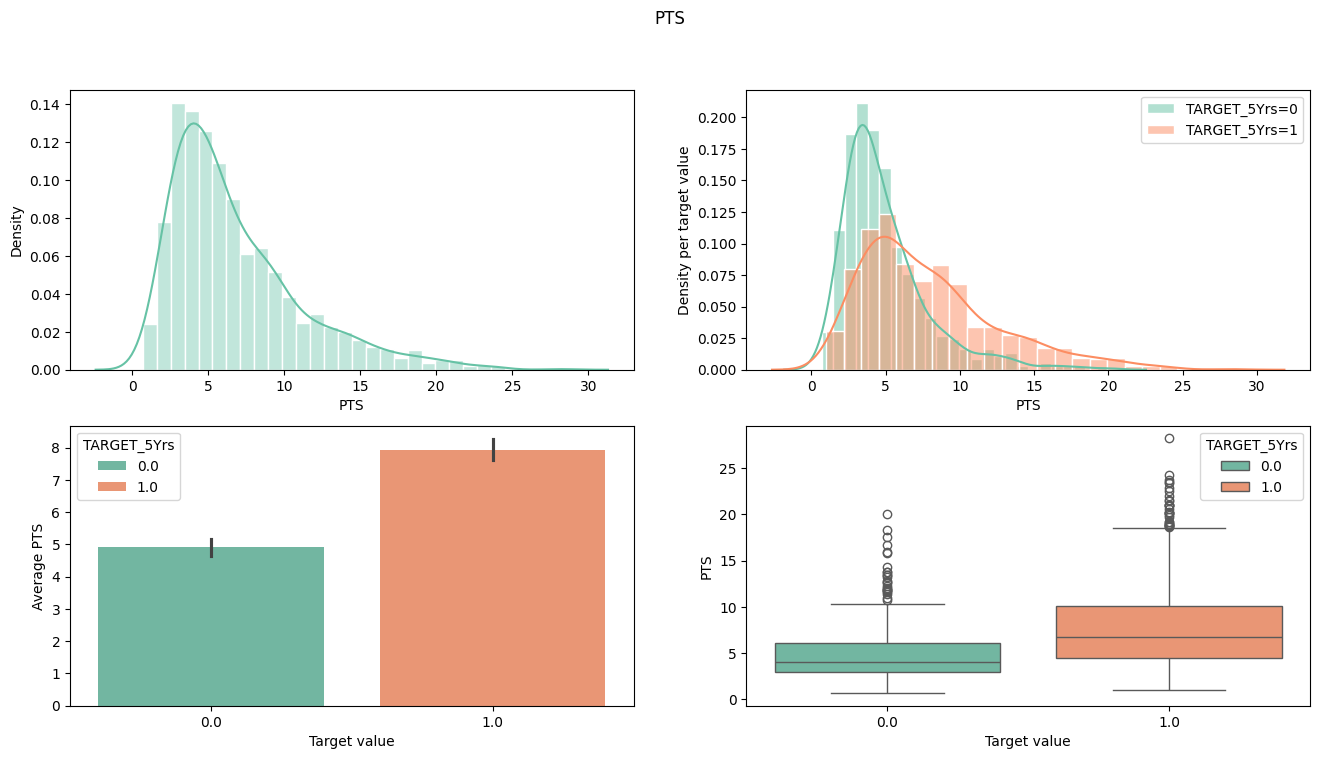

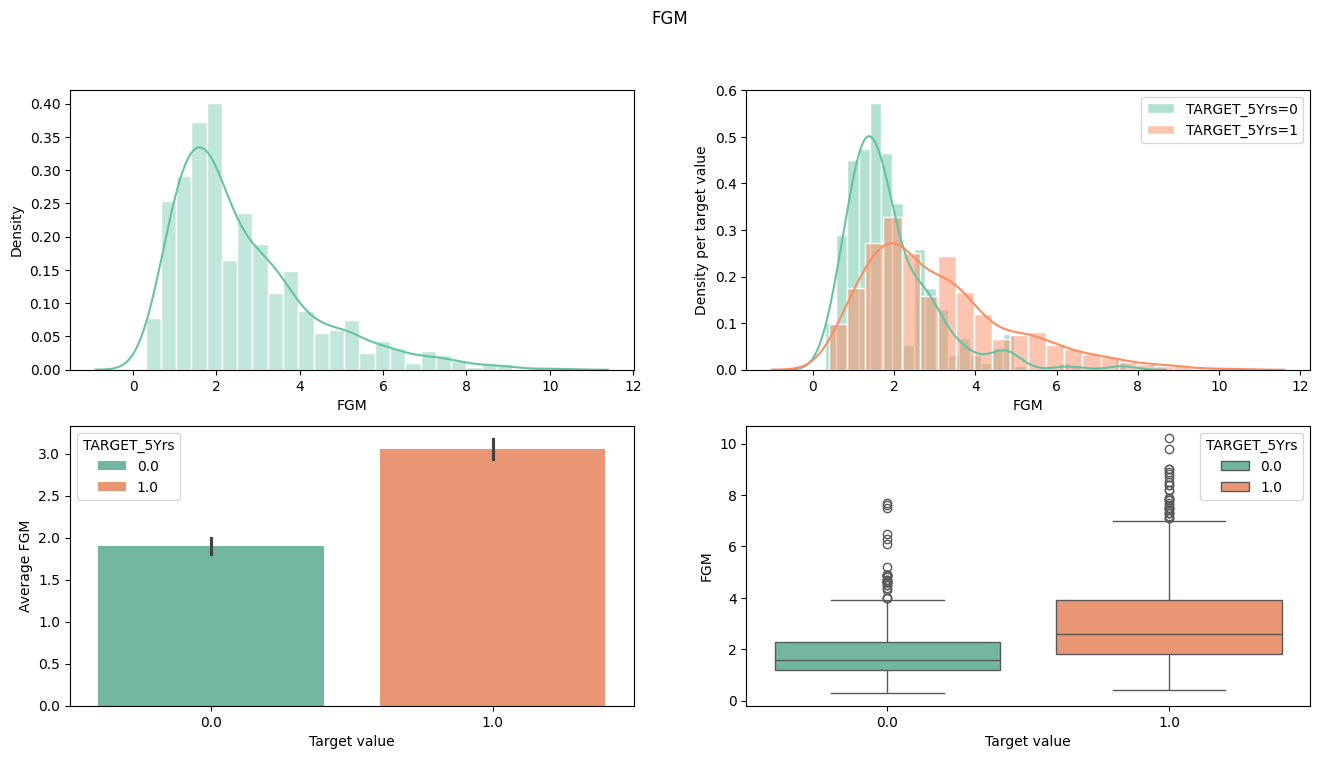

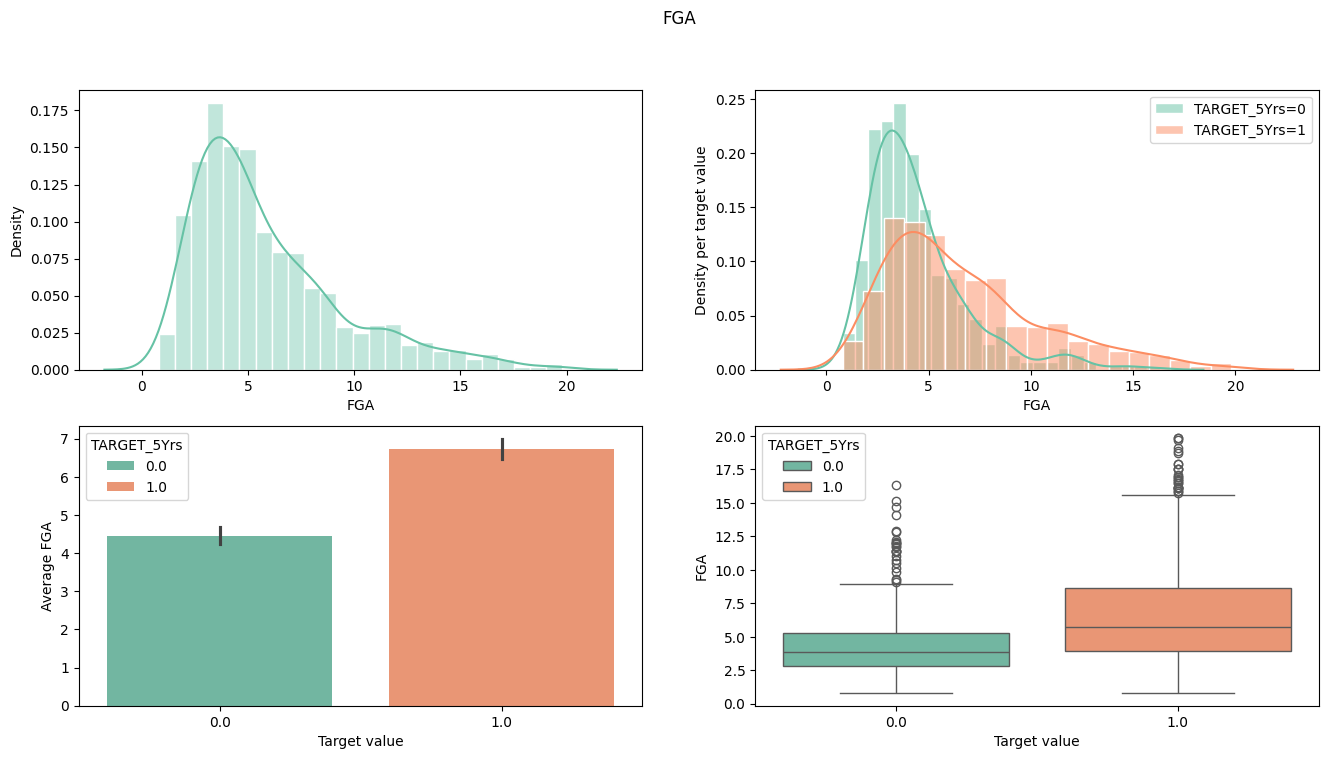

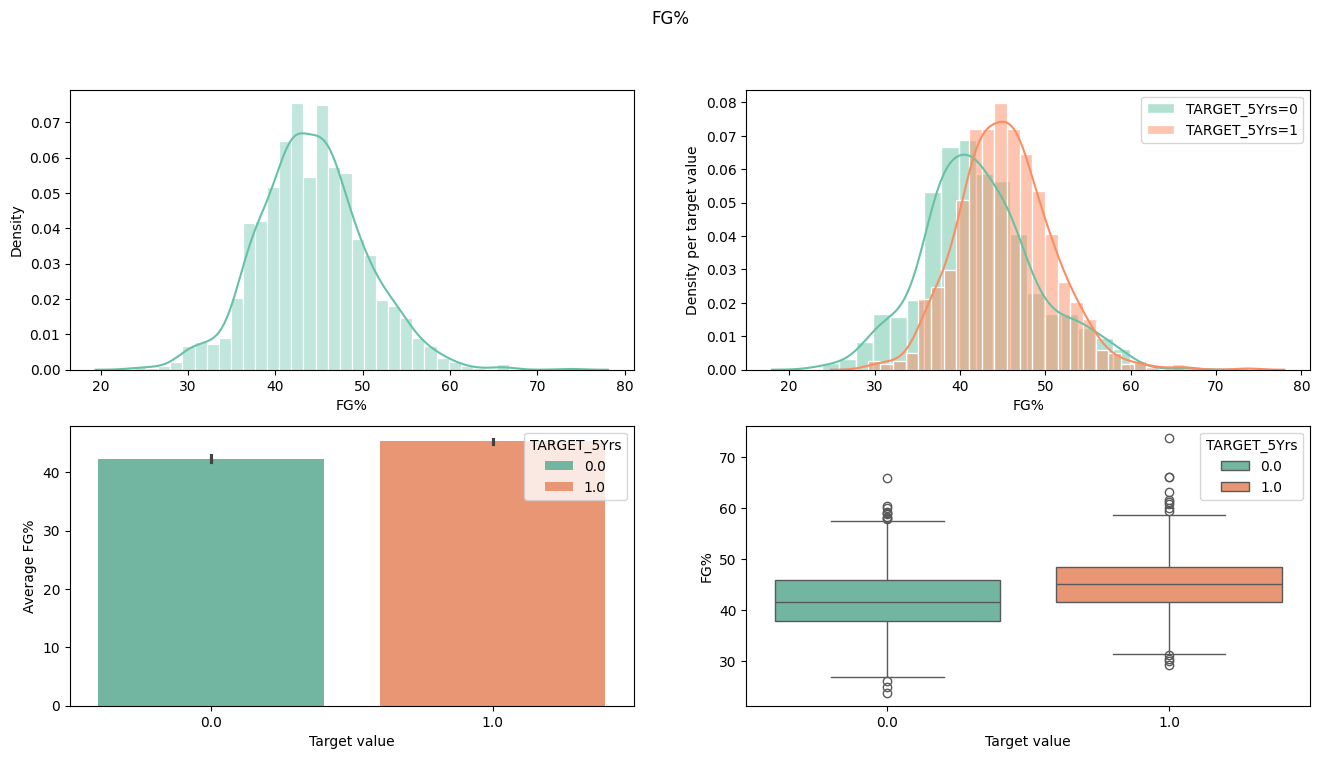

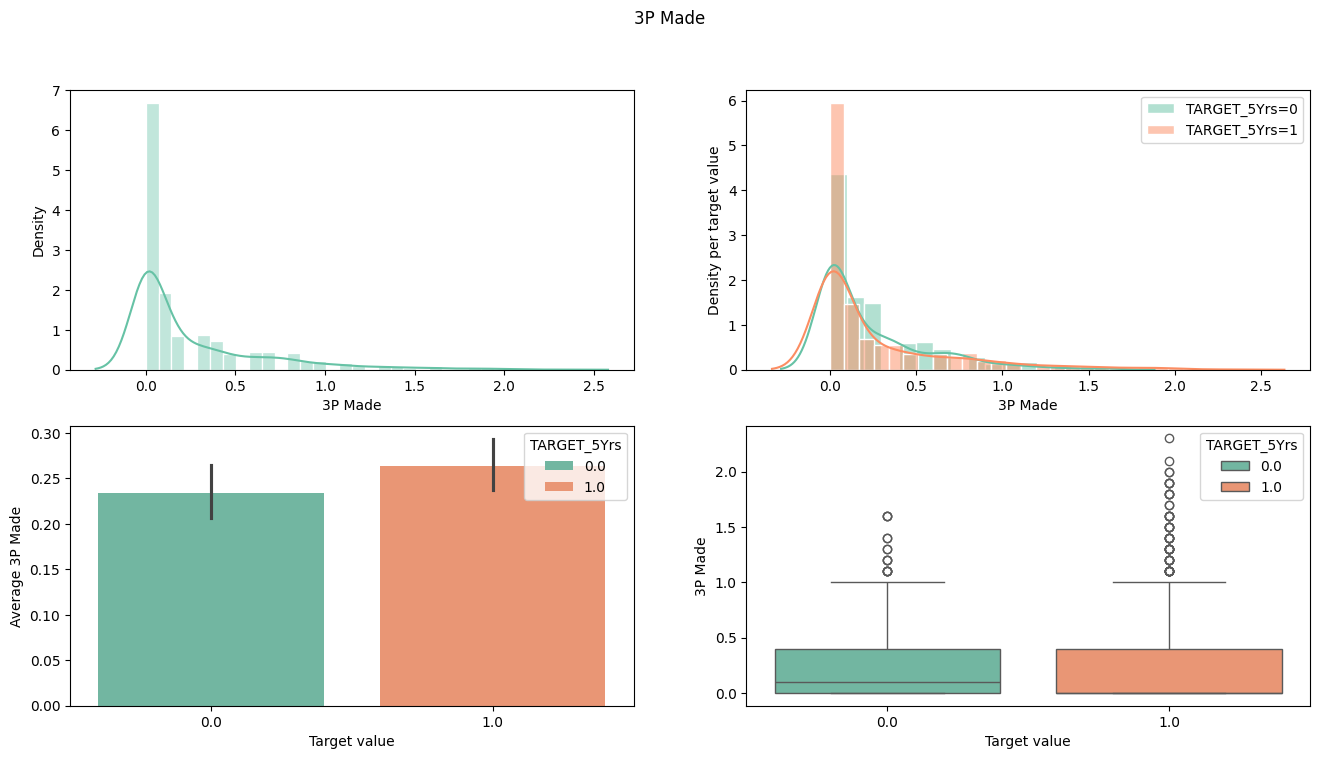

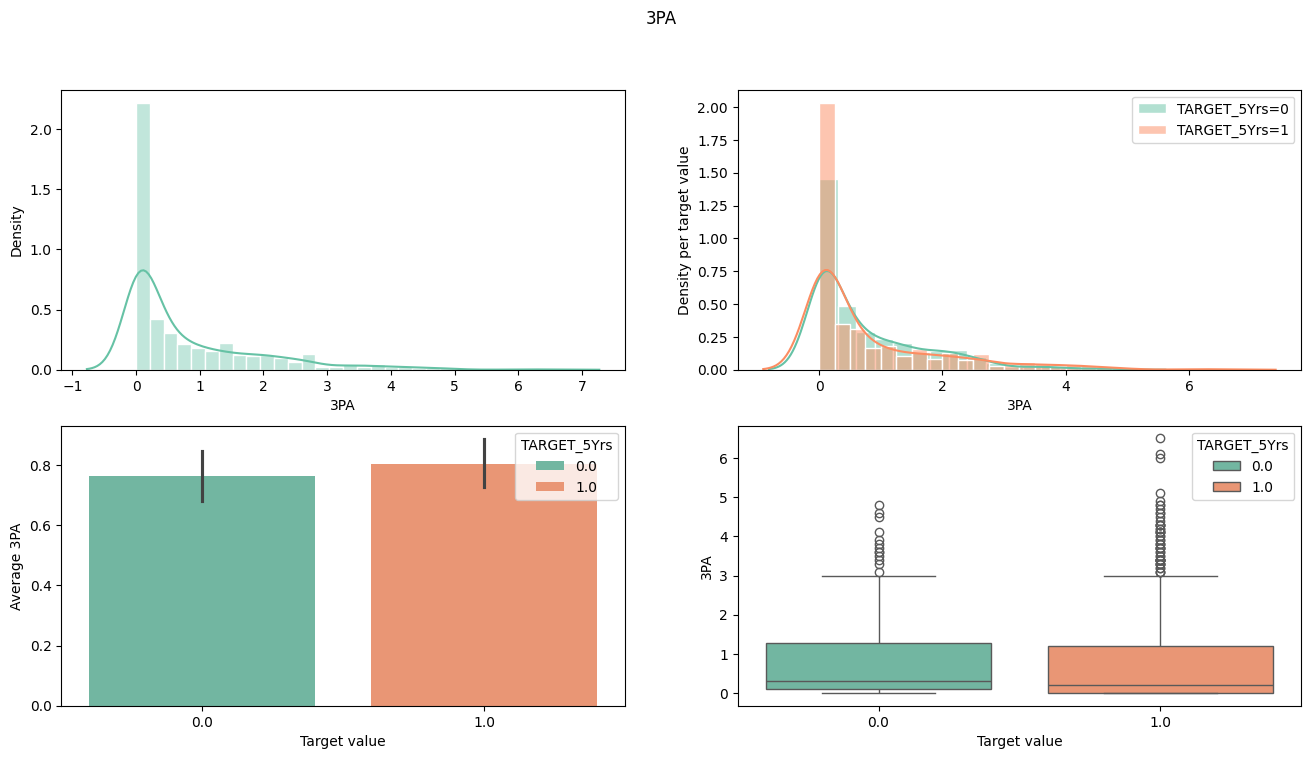

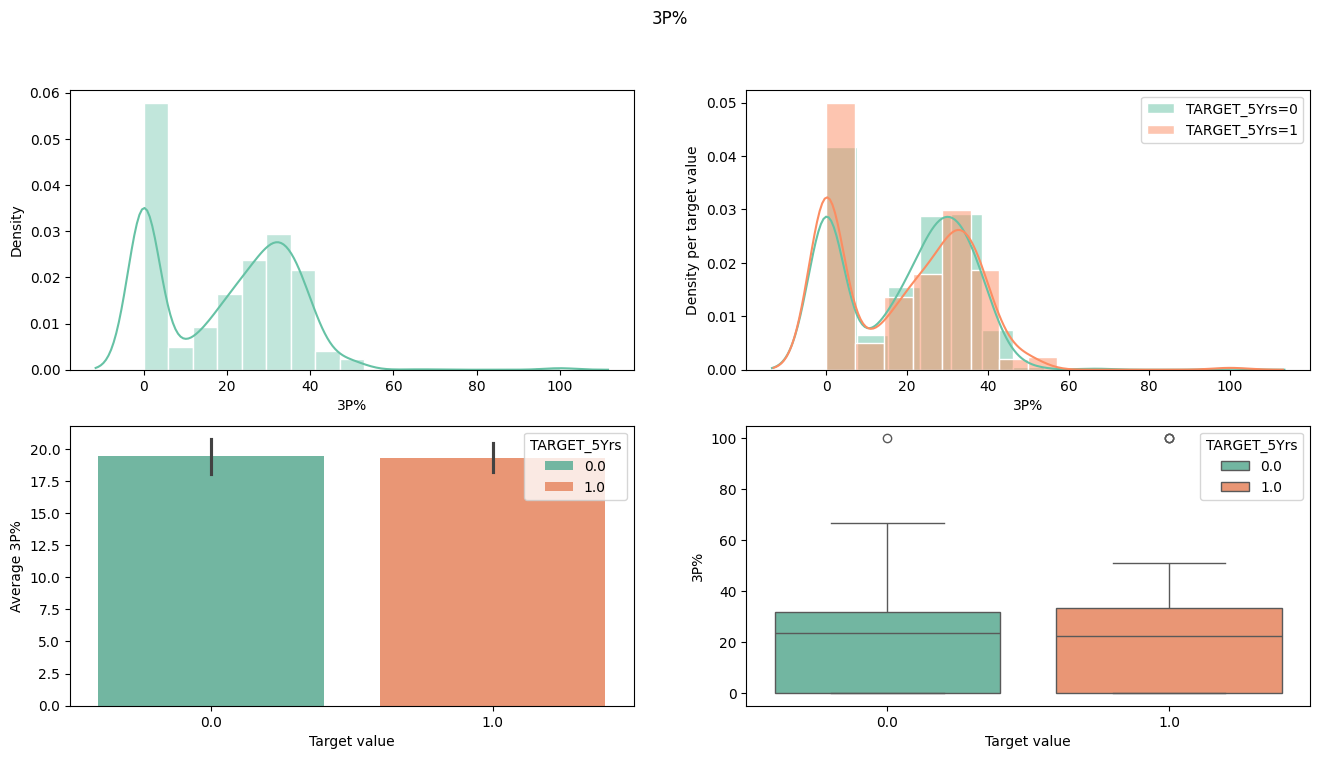

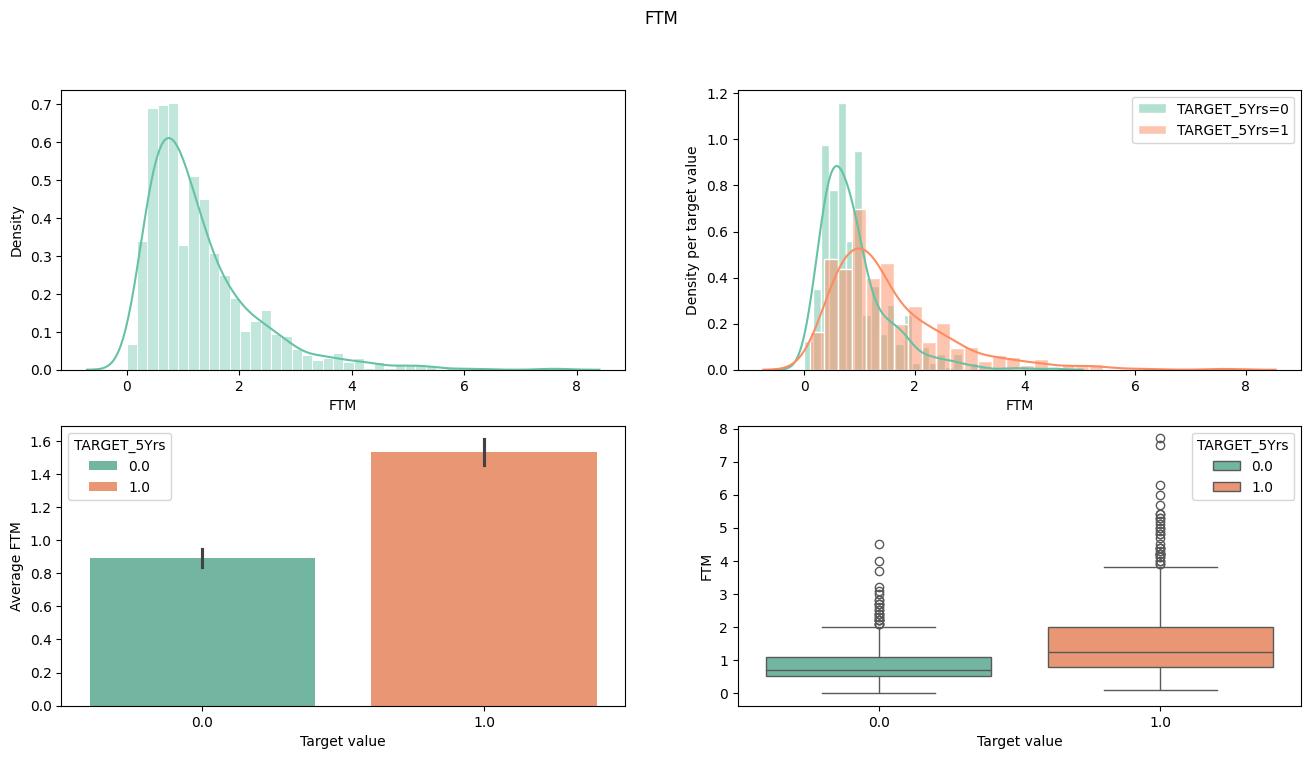

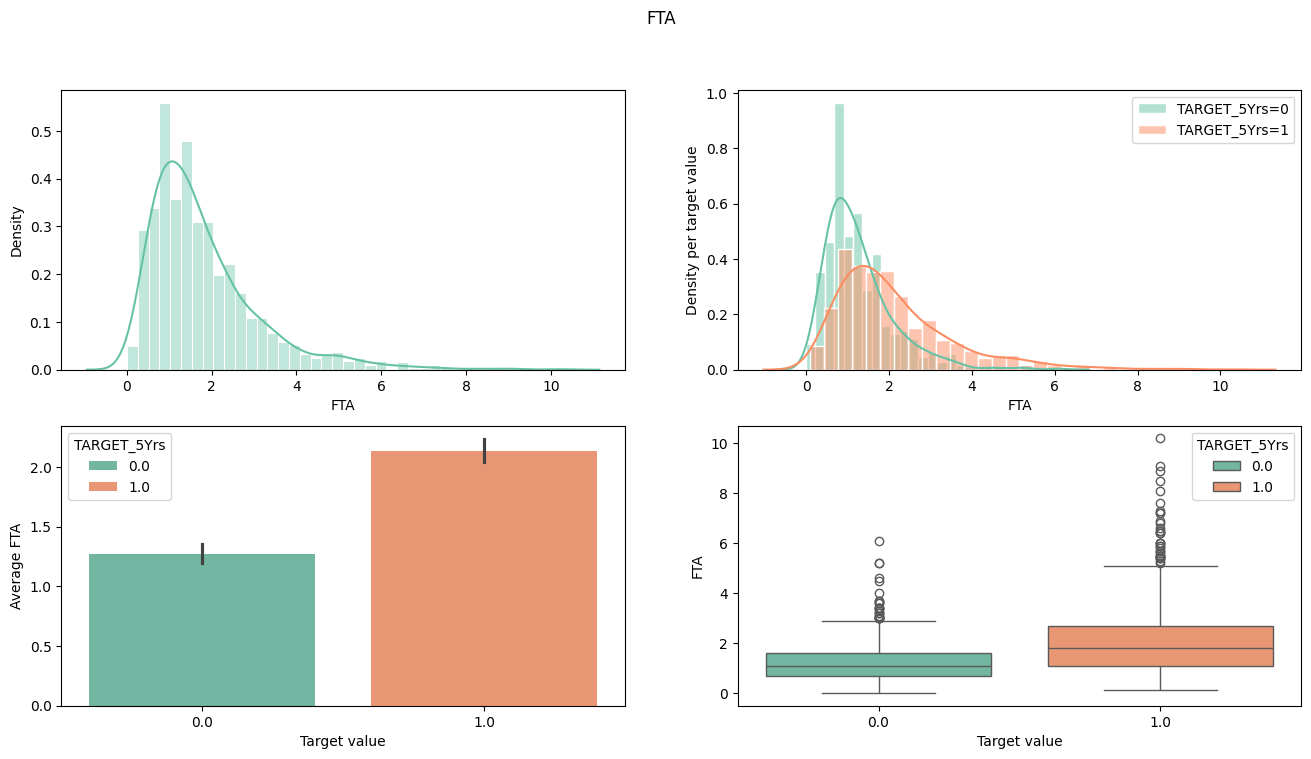

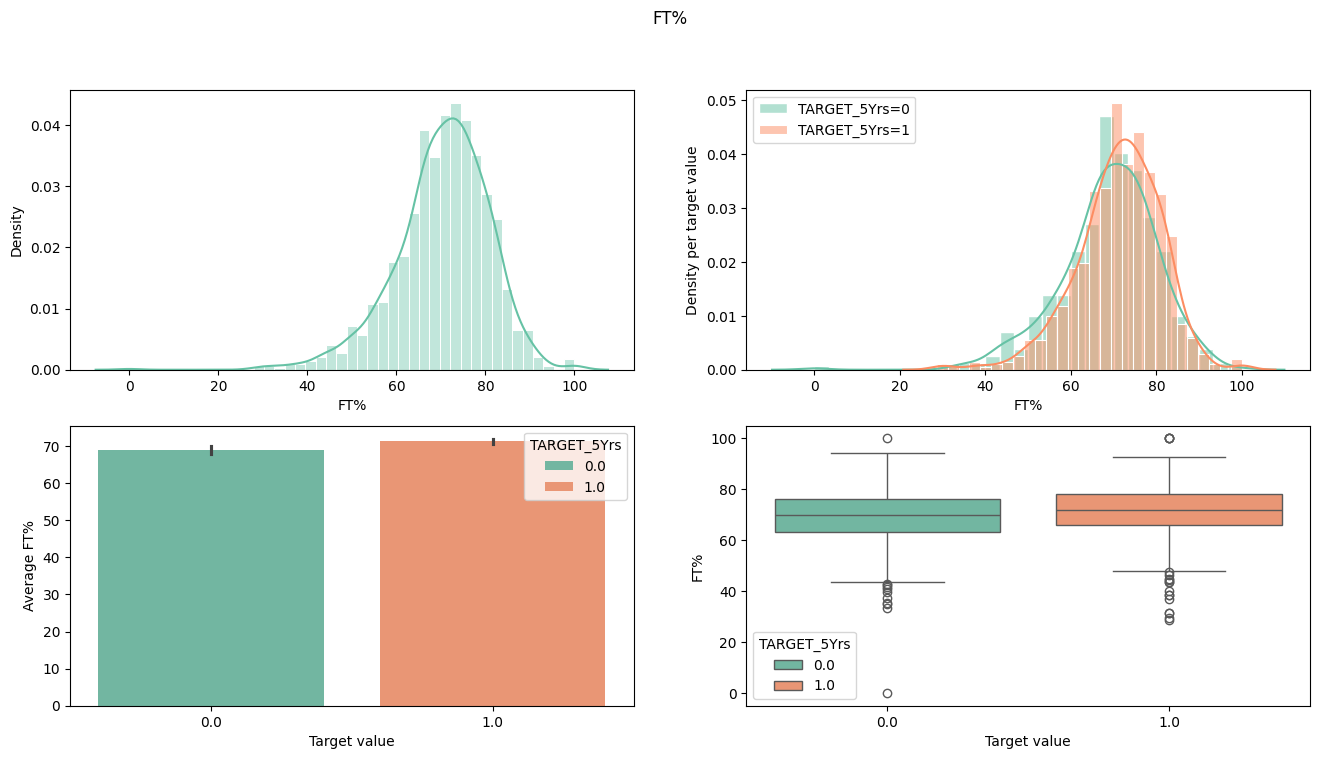

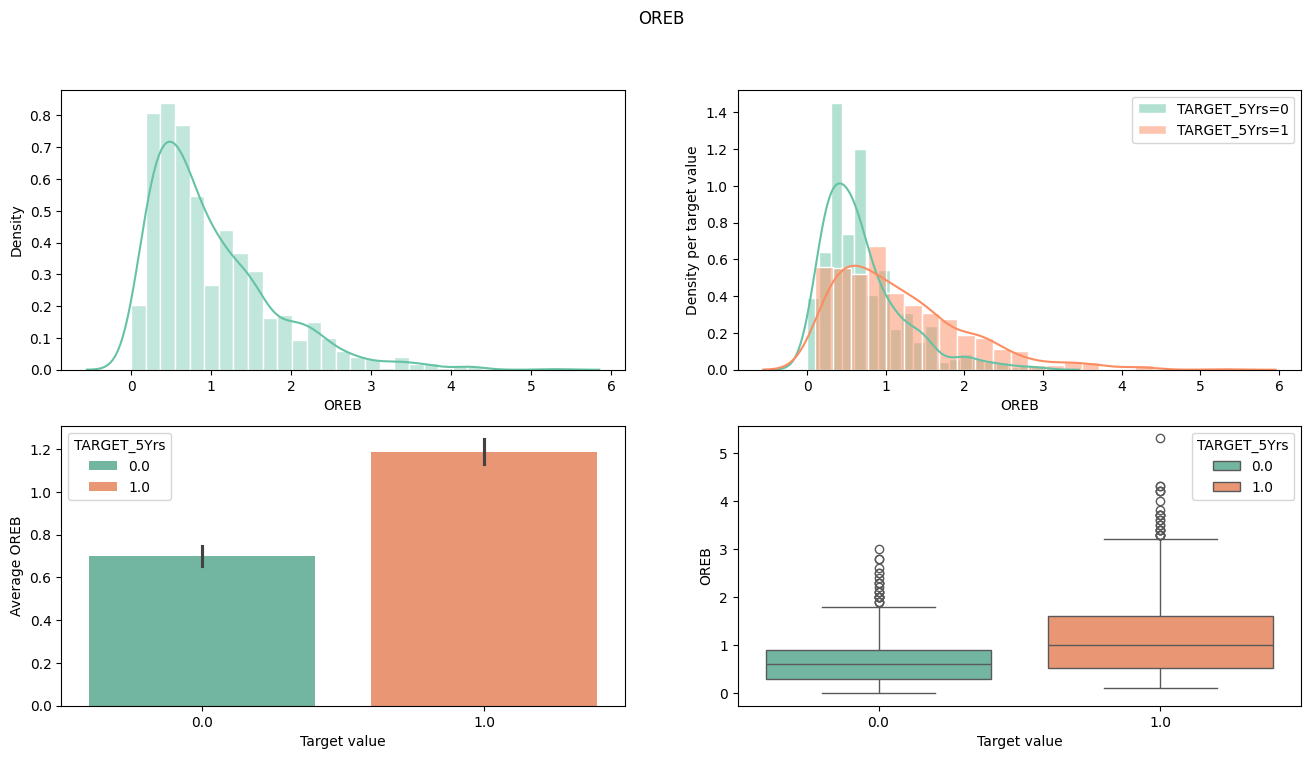

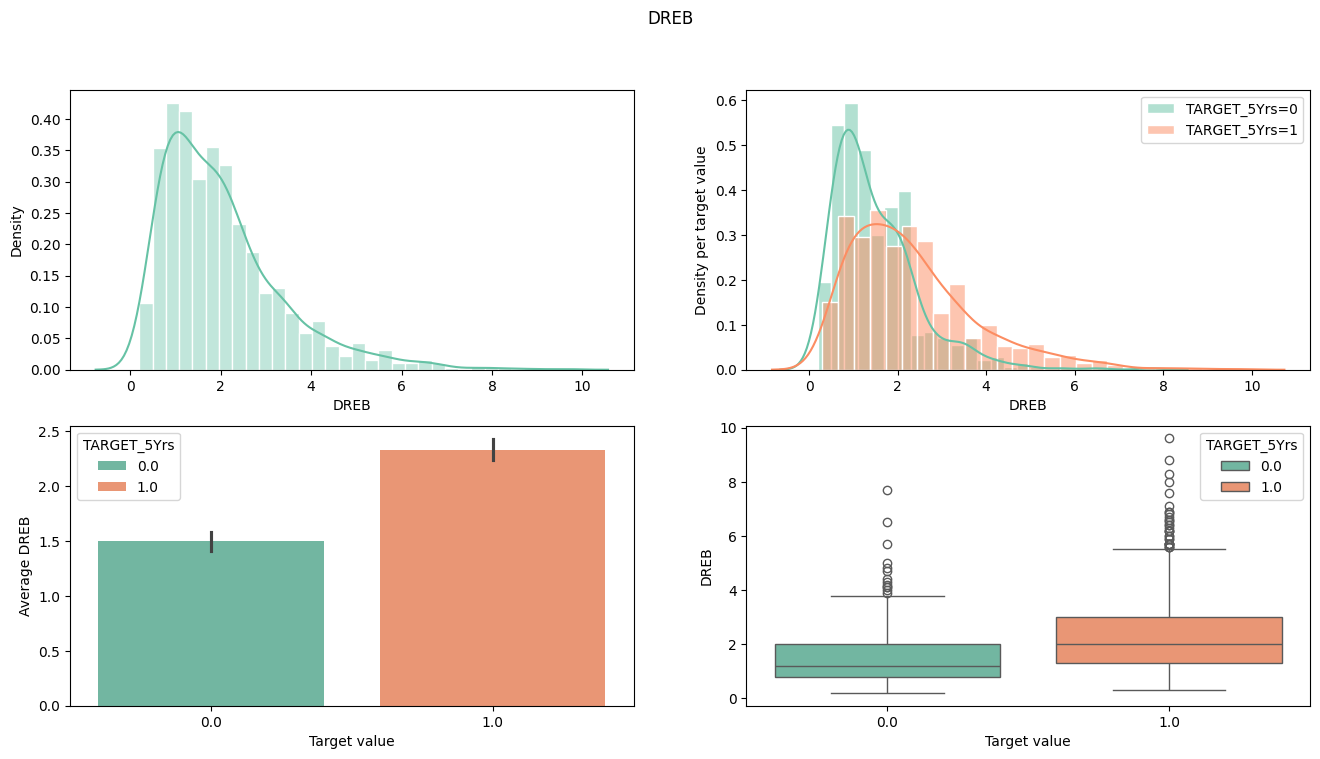

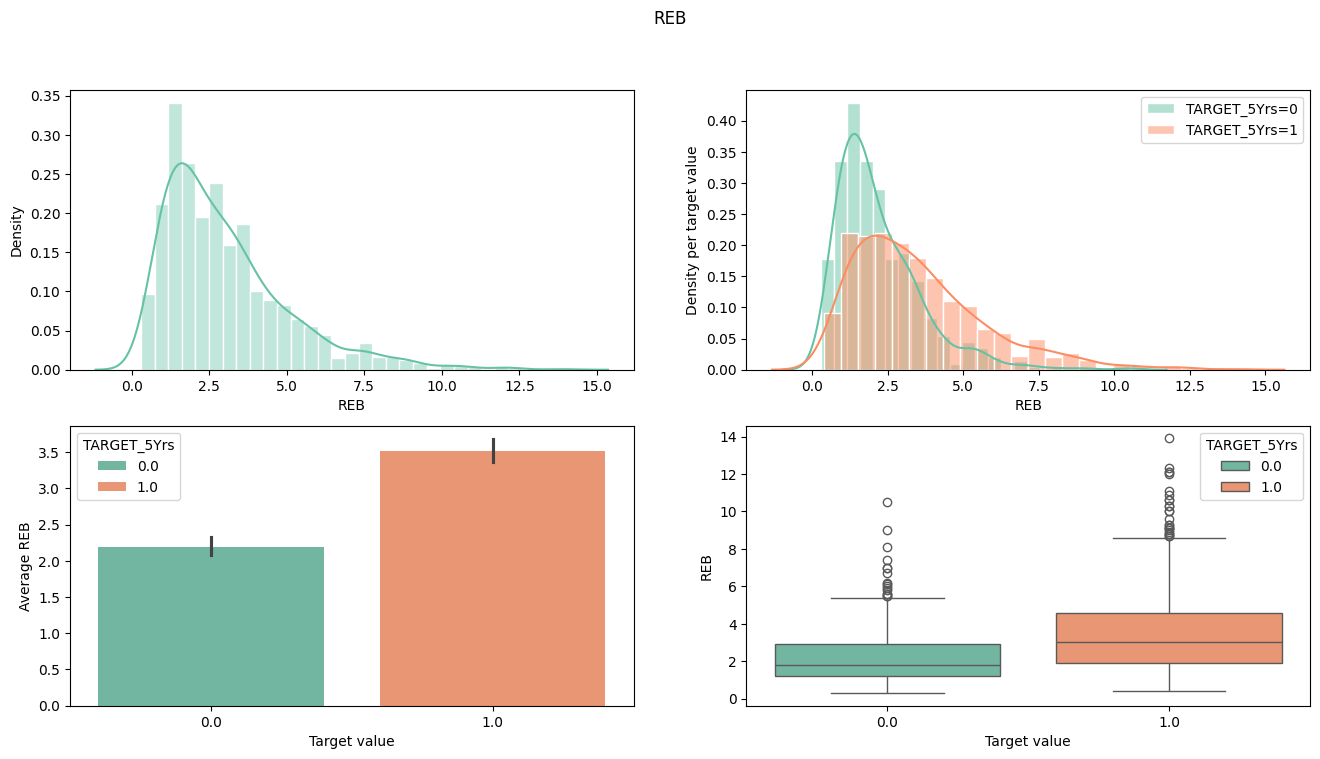

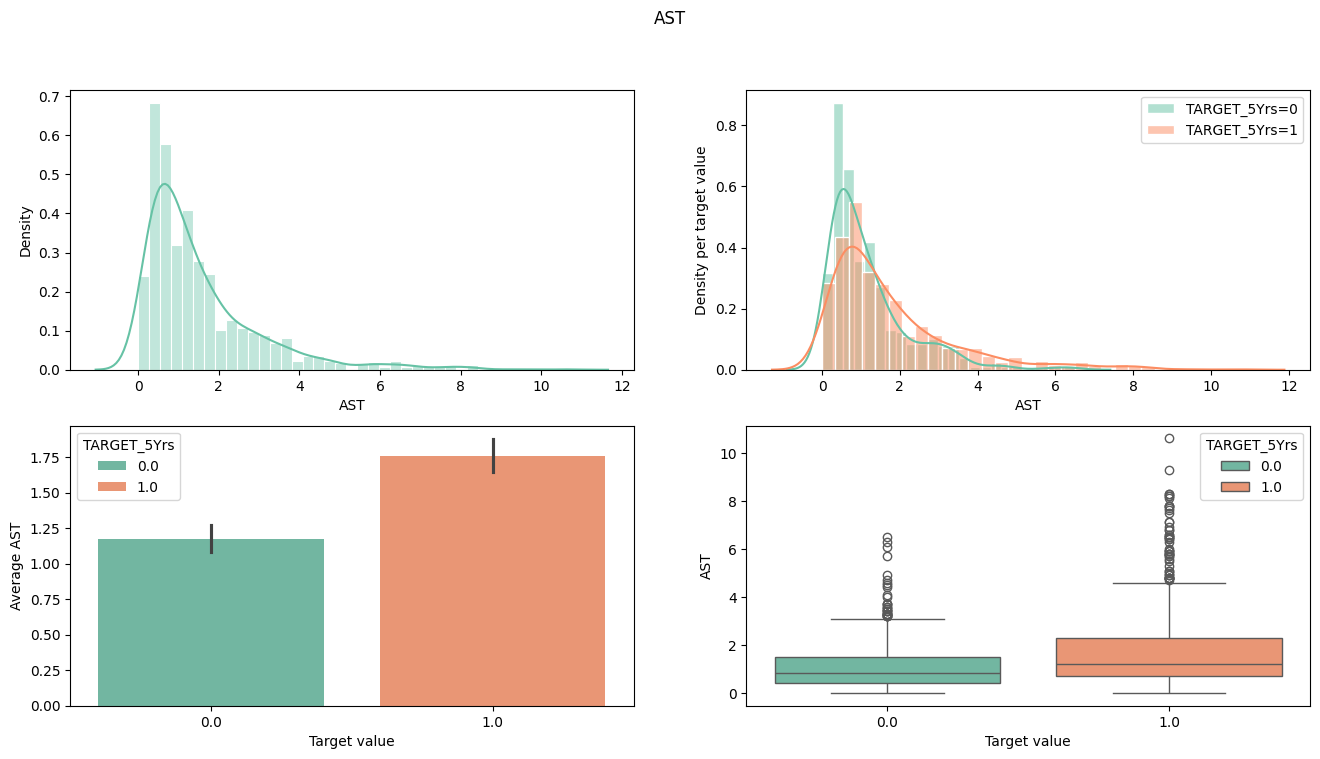

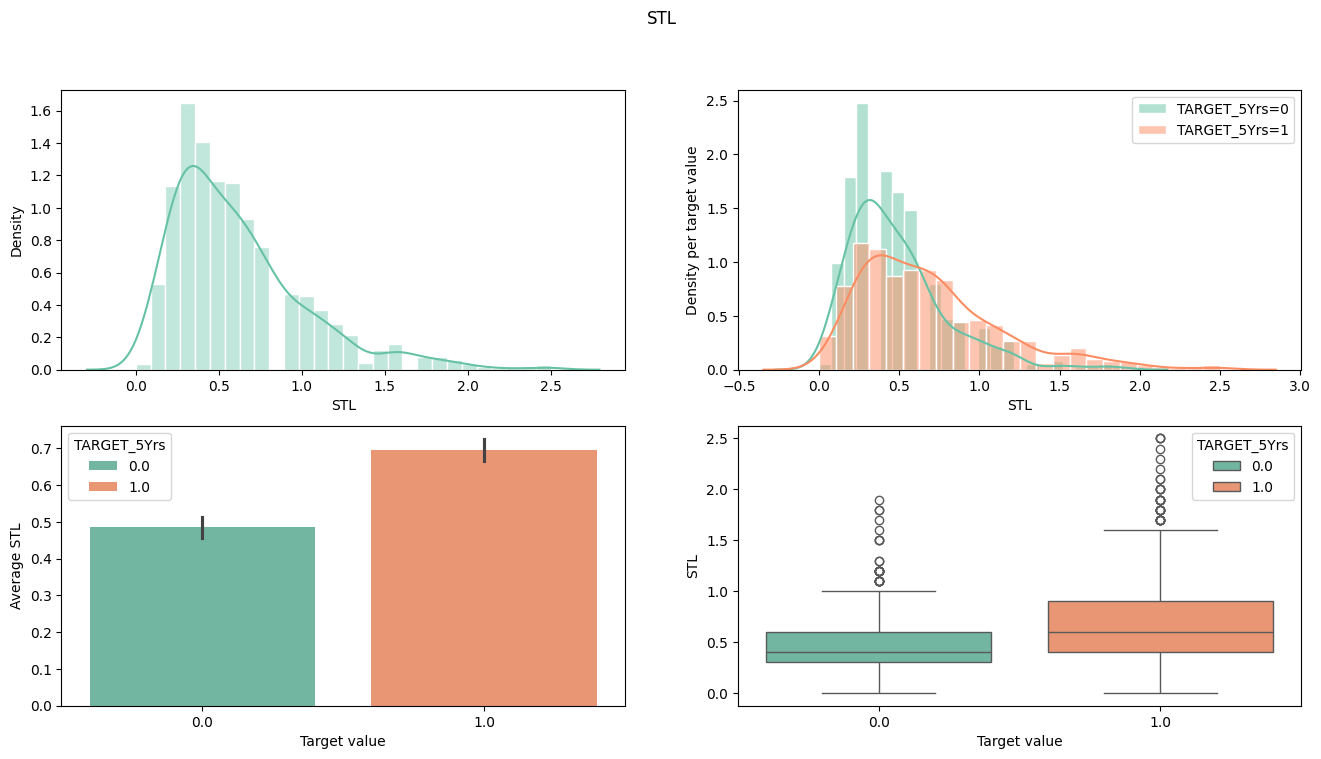

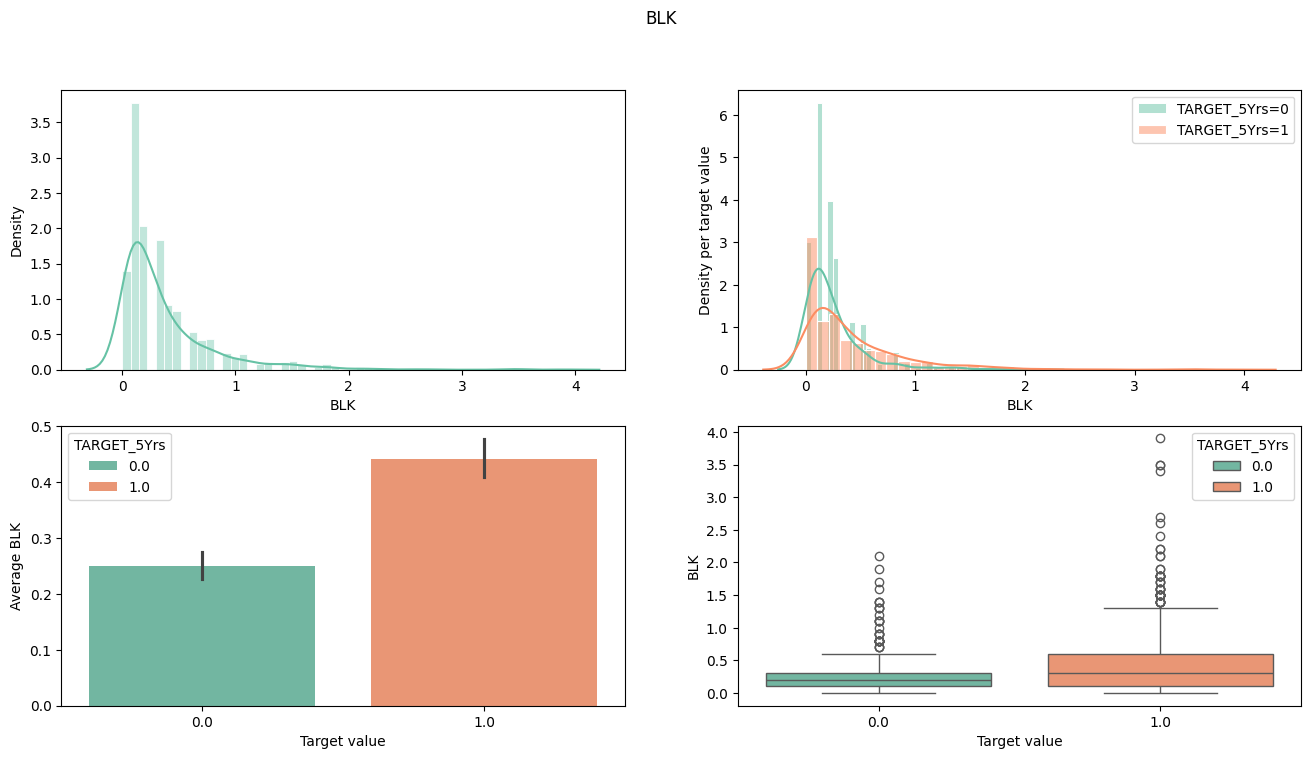

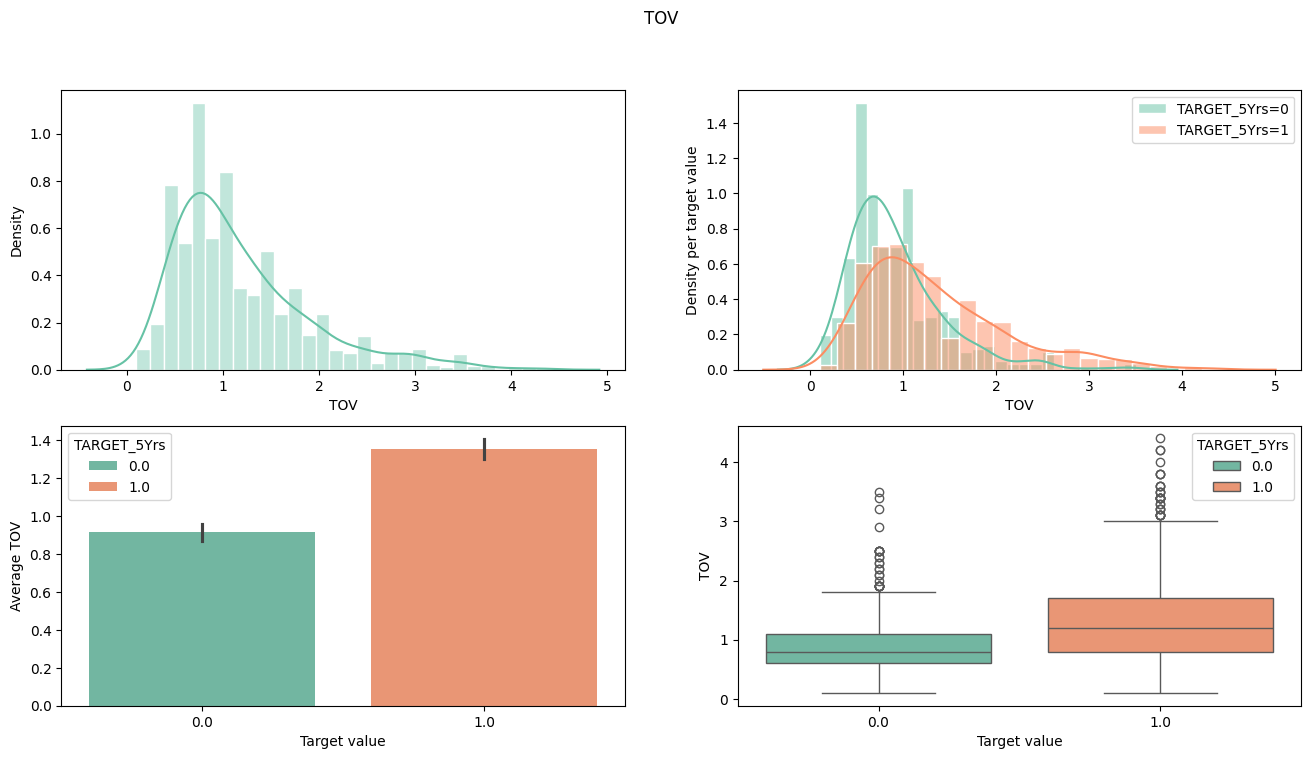

In [28]:
for feature in features:
    fig = plt.figure(figsize=(16, 8))
    plt.suptitle(feature)

    sns.histplot(data[feature], kde=True, stat="density", kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1, 1, 1, 1), ax=plt.subplot(221))
    plt.xlabel(feature)
    plt.ylabel("Density")

    sns.histplot(data.loc[data[target] == 0, feature], kde=True, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, 1), label="TARGET_5Yrs=0", ax=plt.subplot(222))

    sns.histplot(data.loc[data[target] == 1, feature], kde=True, stat="density", kde_kws=dict(cut=3), edgecolor=(1, 1, 1, 1), label="TARGET_5Yrs=1", ax=plt.subplot(222))
    plt.legend(loc="best")
    plt.xlabel(feature)
    plt.ylabel("Density per target value")

    sns.barplot(x=target, y=feature, data=data, hue=target, ax=plt.subplot(223))
    plt.xlabel("Target value")
    plt.ylabel("Average " + feature)

    sns.boxplot(x=target, y=feature, data=data, hue=target, ax=plt.subplot(224))
    plt.xlabel("Target value")
    plt.ylabel(feature)

    plt.show()

A lot of insights can be drawn:
- Some features are not interesting since they don't differenciate clearly between the 2 target classes, like `3PA`, `3P Made`, `3P%`, `FT%`
- As expected, players who play more games and have better performance stats are the ones who have longer careers.
- Looking at the relevant features, short-career rookies (target=0) have a narrower distribution (low variance and high peak), while players who have long careers (target=1) have flatter, more spread out distribution, with a slighly higher mean and a longer tail of highly-performant players.

#### Feature selection

We will start by dropping the name column, since it is only an informative column and doesn't contribute whatsoever to predictive modeling or statistical analysis.

In [29]:
data.drop("Name", axis=1, inplace=True)
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


COMMENT

##### Correlation matrix

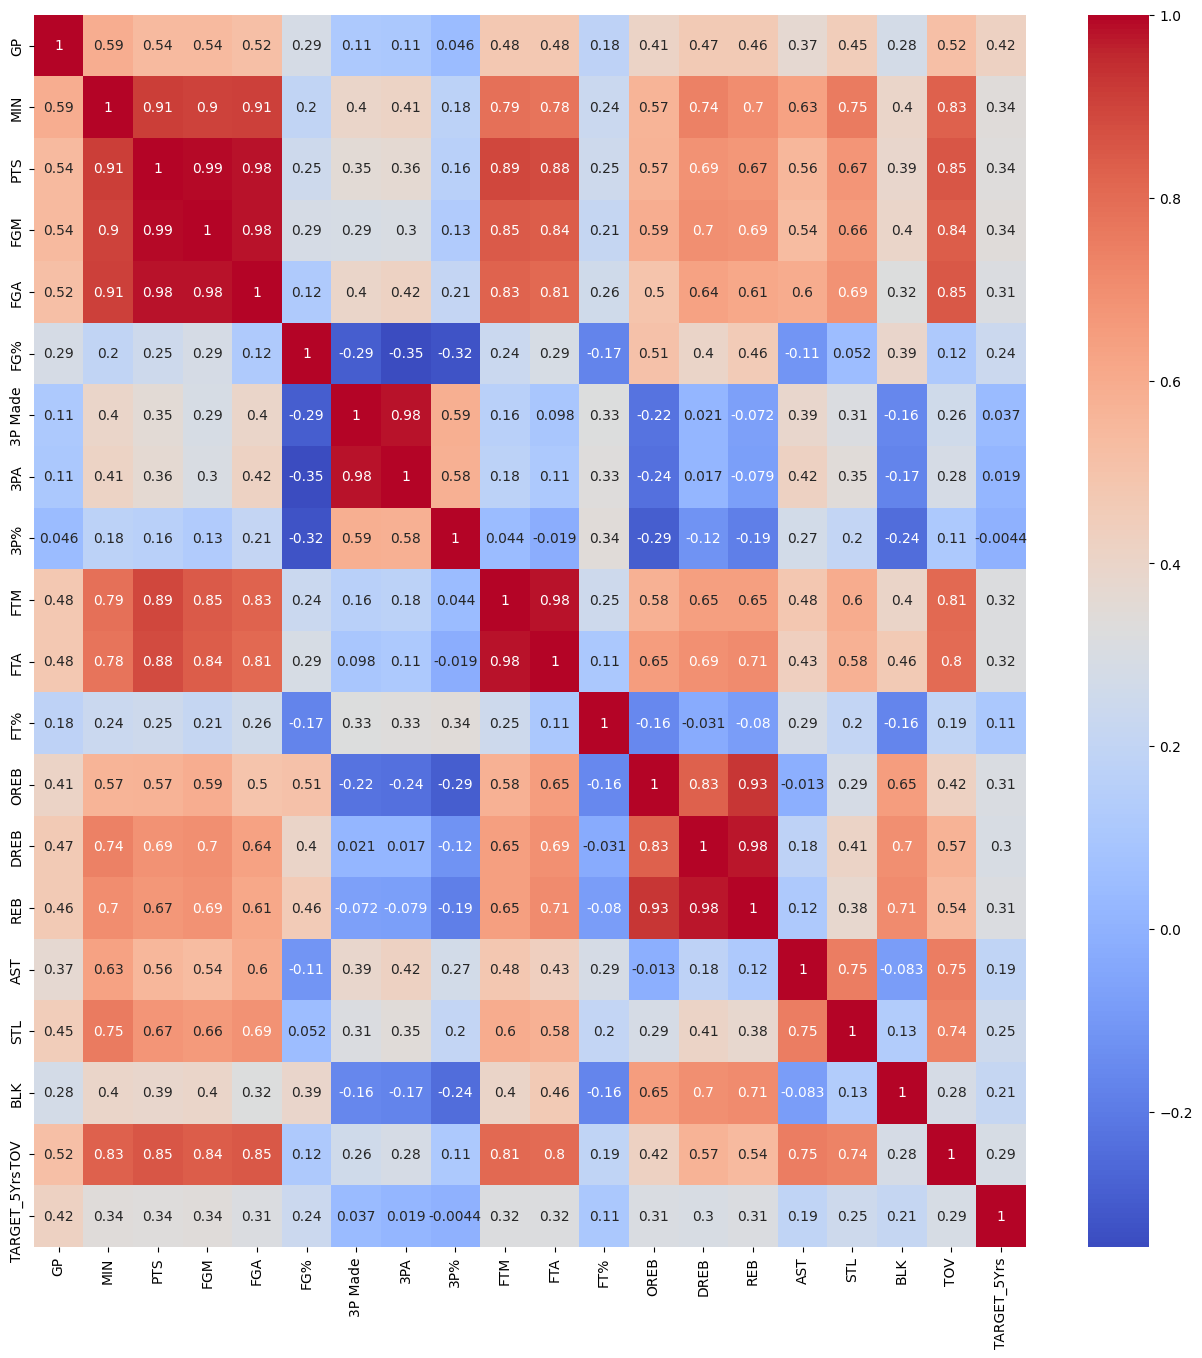

In [30]:
cor_matrix = data.corr()
fig = plt.figure(figsize=(16, 16))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm")
plt.show()

We can notice multiple important points:
- We have multicolinearity due to a high correlation between features, like (`FGA`, `FGM`, `PTS`), (`FTM`, `FTA`), (`3P Made`, `3PA`), and (`REB`, `DREB`, `OREB`). This is very logical: free throws made are a subset of attempted free throws, rebounds is equal to offensive rebounds + defensive rebounds, ... We can eliminate this multicolinearity by choosing one relevant feature from each set of correlated features for example.
- `3PM`, `3PA`, and `3P%` are very weakly correlated to our target variable, and we will probably not select them for our features. 

We will look now at the ANOVA F-value.

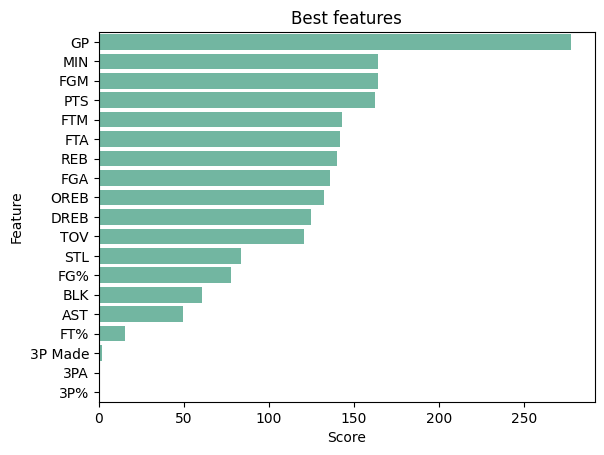

In [31]:
X = data[data.columns.difference(["TARGET_5Yrs"])]
y = data[target]

bestfeatures = SelectKBest(f_classif, k="all")
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Feature", "Score"]
featureScores = featureScores.sort_values(by="Score", ascending=False)

sns.barplot(x="Score", y="Feature", data=featureScores)
plt.title("Best features")
plt.show()

##### PCA

Finally, let's check if PCA might be of any use for us.

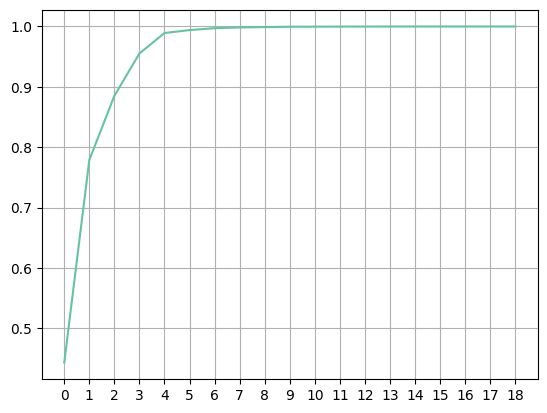

In [32]:
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xticks(np.arange(0, len(X.columns), 1))
plt.show()

2 components explain more than 85% of the variance in our data. Let's plot our data on the 2 selected components

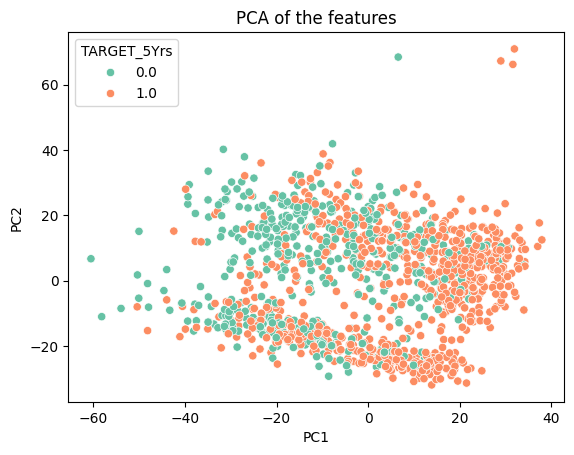

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca["TARGET_5Yrs"] = y.values

sns.scatterplot(x="PC1", y="PC2", data=X_pca, hue="TARGET_5Yrs")
plt.title("PCA of the features")
plt.show()

PCA does not really succeed in distinguishing between the 2 classes. We will not use it in our model.

#### Final feature selection decision

Going forward, we will be using the top 4 features selected by the ANOVA F-value:
- `GP`
- `MIN`
- `PTS`
- `FGM`